# NAMA: ROSMALINDA
# NIM: 09011282328086
# KELAS: SK3B

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew, kurtosis

In [32]:
df= pd.read_csv('C:/Users/User/heart disis/heart_disease_uci.csv')


In [5]:
display(df.head())

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [7]:
display(df.tail())

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [11]:
df.shape

(920, 16)

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None


In [13]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [15]:
df.isnull().sum()/df.shape[0]*100

id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64

In [11]:
# Cek outliers pada seluruh kolom numeric
numeric_df= df.select_dtypes(include=['number'])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas atas dan bawah untuk mendeteksi outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cek outliers (nilai di luar rentang IQR untuk age)
outliers = ((numeric_df < lower_bound) | (numeric_df > upper_bound)).sum()
print(outliers)

id            0
age           0
trestbps     28
chol        183
thalch        2
oldpeak      16
ca           20
num           0
dtype: int64


In [23]:
numeric_df = df.select_dtypes(include=['number'])
print("---Mean---")
print(numeric_df.mean())
print("---Median---")
print(numeric_df.median())
print("---Mode---")
print(numeric_df.mode().iloc[0])
print("---Std---")
print(numeric_df.std())
print("---Var---")
print(numeric_df.var())
print("---Skew---")
print(numeric_df.skew())
print("---Kurtosis---")
print(numeric_df.kurtosis)

---Mean---
id          460.500000
age          53.510870
trestbps    132.132404
chol        199.130337
thalch      137.545665
oldpeak       0.878788
ca            0.676375
num           0.995652
dtype: float64
---Median---
id          460.5
age          54.0
trestbps    130.0
chol        223.0
thalch      140.0
oldpeak       0.5
ca            0.0
num           1.0
dtype: float64
---Mode---
id            1.0
age          54.0
trestbps    120.0
chol          0.0
thalch      150.0
oldpeak       0.0
ca            0.0
num           0.0
Name: 0, dtype: float64
---Std---
id          265.725422
age           9.424685
trestbps     19.066070
chol        110.780810
thalch       25.926276
oldpeak       1.091226
ca            0.935653
num           1.142693
dtype: float64
---Var---
id          70610.000000
age            88.824691
trestbps      363.515007
chol        12272.387943
thalch        672.171813
oldpeak         1.190775
ca              0.875447
num             1.305748
dtype: float64
---Sk

In [25]:
# Hitung kurtosis untuk kolom numerik
kurtosis_values = df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']].apply(kurtosis)
print("Kurtosis:")
print(kurtosis_values)

Kurtosis:
age        -0.387367
trestbps         NaN
chol             NaN
thalch           NaN
oldpeak          NaN
ca               NaN
num        -0.110274
dtype: float64


In [37]:
#Mengisis NaN dengan mean untuk kolom numerik
for col in df.select_dtypes(include=['float64']).columns:
    df[col] = df[col].fillna(df[col].mean())

# Hitung kurtosis untuk kolom numerik
kurtosis_values = df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']].apply(kurtosis)
print("Kurtosis:")
print(kurtosis_values)

Kurtosis:
age        -0.387367
trestbps    3.341215
chol        0.158173
thalch     -0.323900
oldpeak     1.410775
ca          6.458820
num        -0.110274
dtype: float64


In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,920.0,460.500000,265.725422,1.0,230.75,460.5,690.25,920.0
age,920.0,53.510870,9.424685,28.0,47.00,54.0,60.00,77.0
trestbps,861.0,132.132404,19.066070,0.0,120.00,130.0,140.00,200.0
chol,890.0,199.130337,110.780810,0.0,175.00,223.0,268.00,603.0
thalch,865.0,137.545665,25.926276,60.0,120.00,140.0,157.00,202.0
oldpeak,858.0,0.878788,1.091226,-2.6,0.00,0.5,1.50,6.2
ca,309.0,0.676375,0.935653,0.0,0.00,0.0,1.00,3.0
num,920.0,0.995652,1.142693,0.0,0.00,1.0,2.00,4.0


               age      chol   oldpeak  trestbps    thalch        ca       num
age       1.000000 -0.084499  0.248082  0.235253 -0.353471  0.204139  0.339596
chol     -0.084499  1.000000  0.045498  0.088290  0.226325  0.017544 -0.228238
oldpeak   0.248082  0.045498  1.000000  0.160268 -0.149630  0.178886  0.421907
trestbps  0.235253  0.088290  0.160268  1.000000 -0.104616  0.051940  0.116225
thalch   -0.353471  0.226325 -0.149630 -0.104616  1.000000 -0.140644 -0.351055
ca        0.204139  0.017544  0.178886  0.051940 -0.140644  1.000000  0.321404
num       0.339596 -0.228238  0.421907  0.116225 -0.351055  0.321404  1.000000


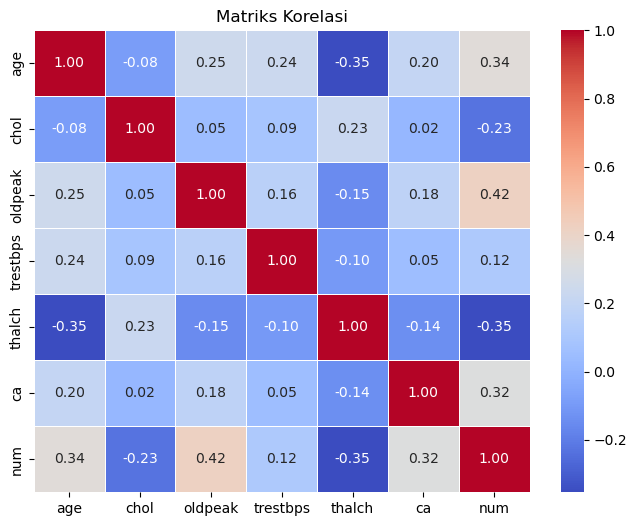

In [31]:
# Menghitung matriks korelasi
correlation_matrix = df[['age','chol','oldpeak','trestbps','thalch','ca','num']].corr()

# Tampilkan matriks korelasi
print(correlation_matrix)

# Visualisasi matriks korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi')
plt.show()

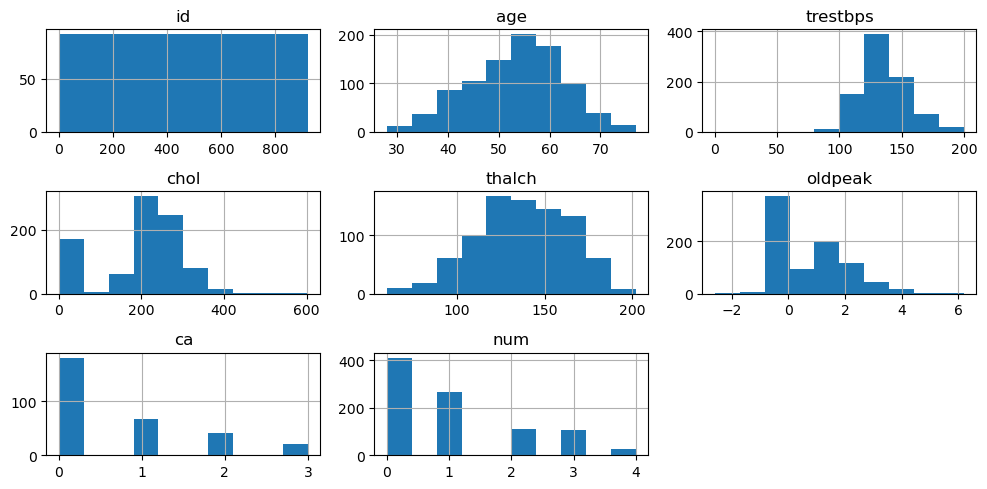

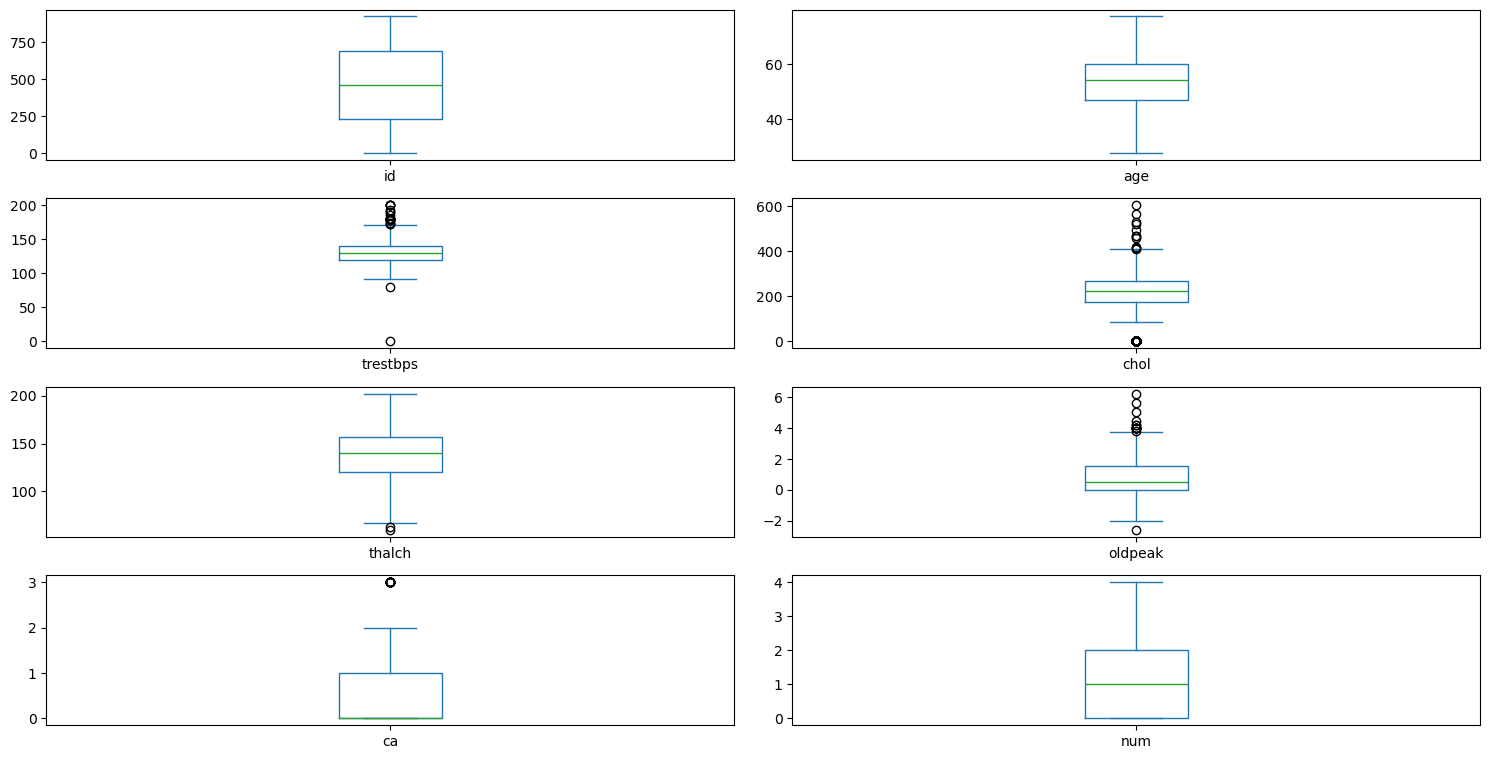

In [35]:
# Histogram
df.hist(figsize=(10, 5))
plt.tight_layout()
plt.show()

# Box Plot
df.plot(kind='box', subplots=True, layout=(len(df.columns)//2, 2), figsize=(15, 15))
plt.tight_layout()
plt.show()



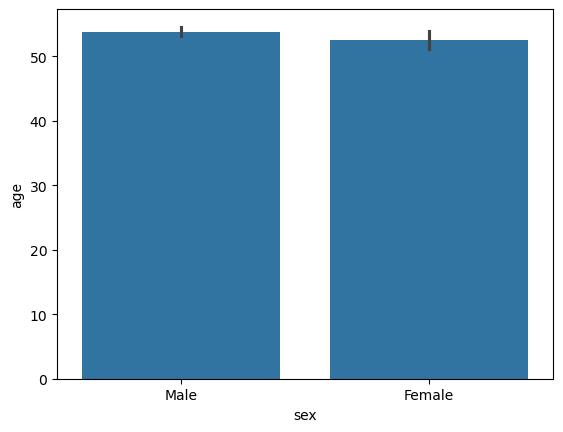

In [49]:
res = sns.barplot(x='sex', y='age', data=df)
plt.show()

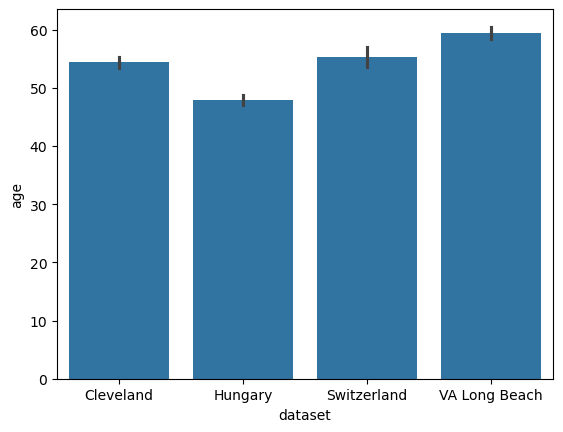

In [51]:
res = sns.barplot(x='dataset', y='age', data=df)
plt.show()

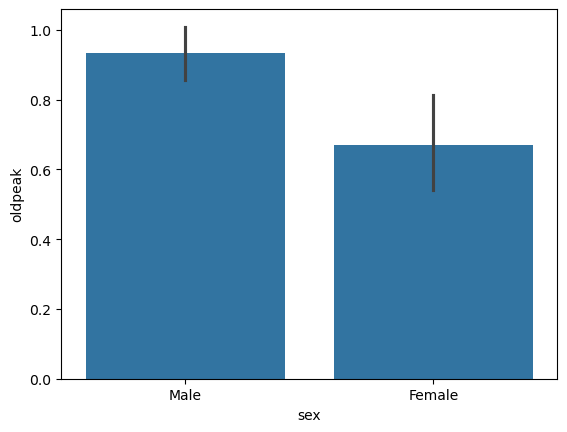

In [53]:
res = sns.barplot(x='sex', y='oldpeak', data=df)
plt.show()

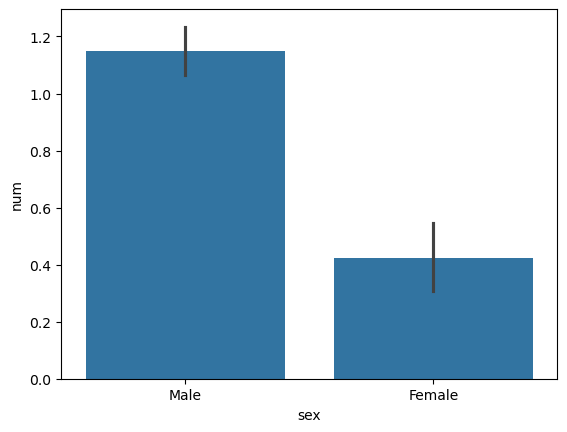

In [55]:
res = sns.barplot(x='sex', y='num', data=df)
plt.show()

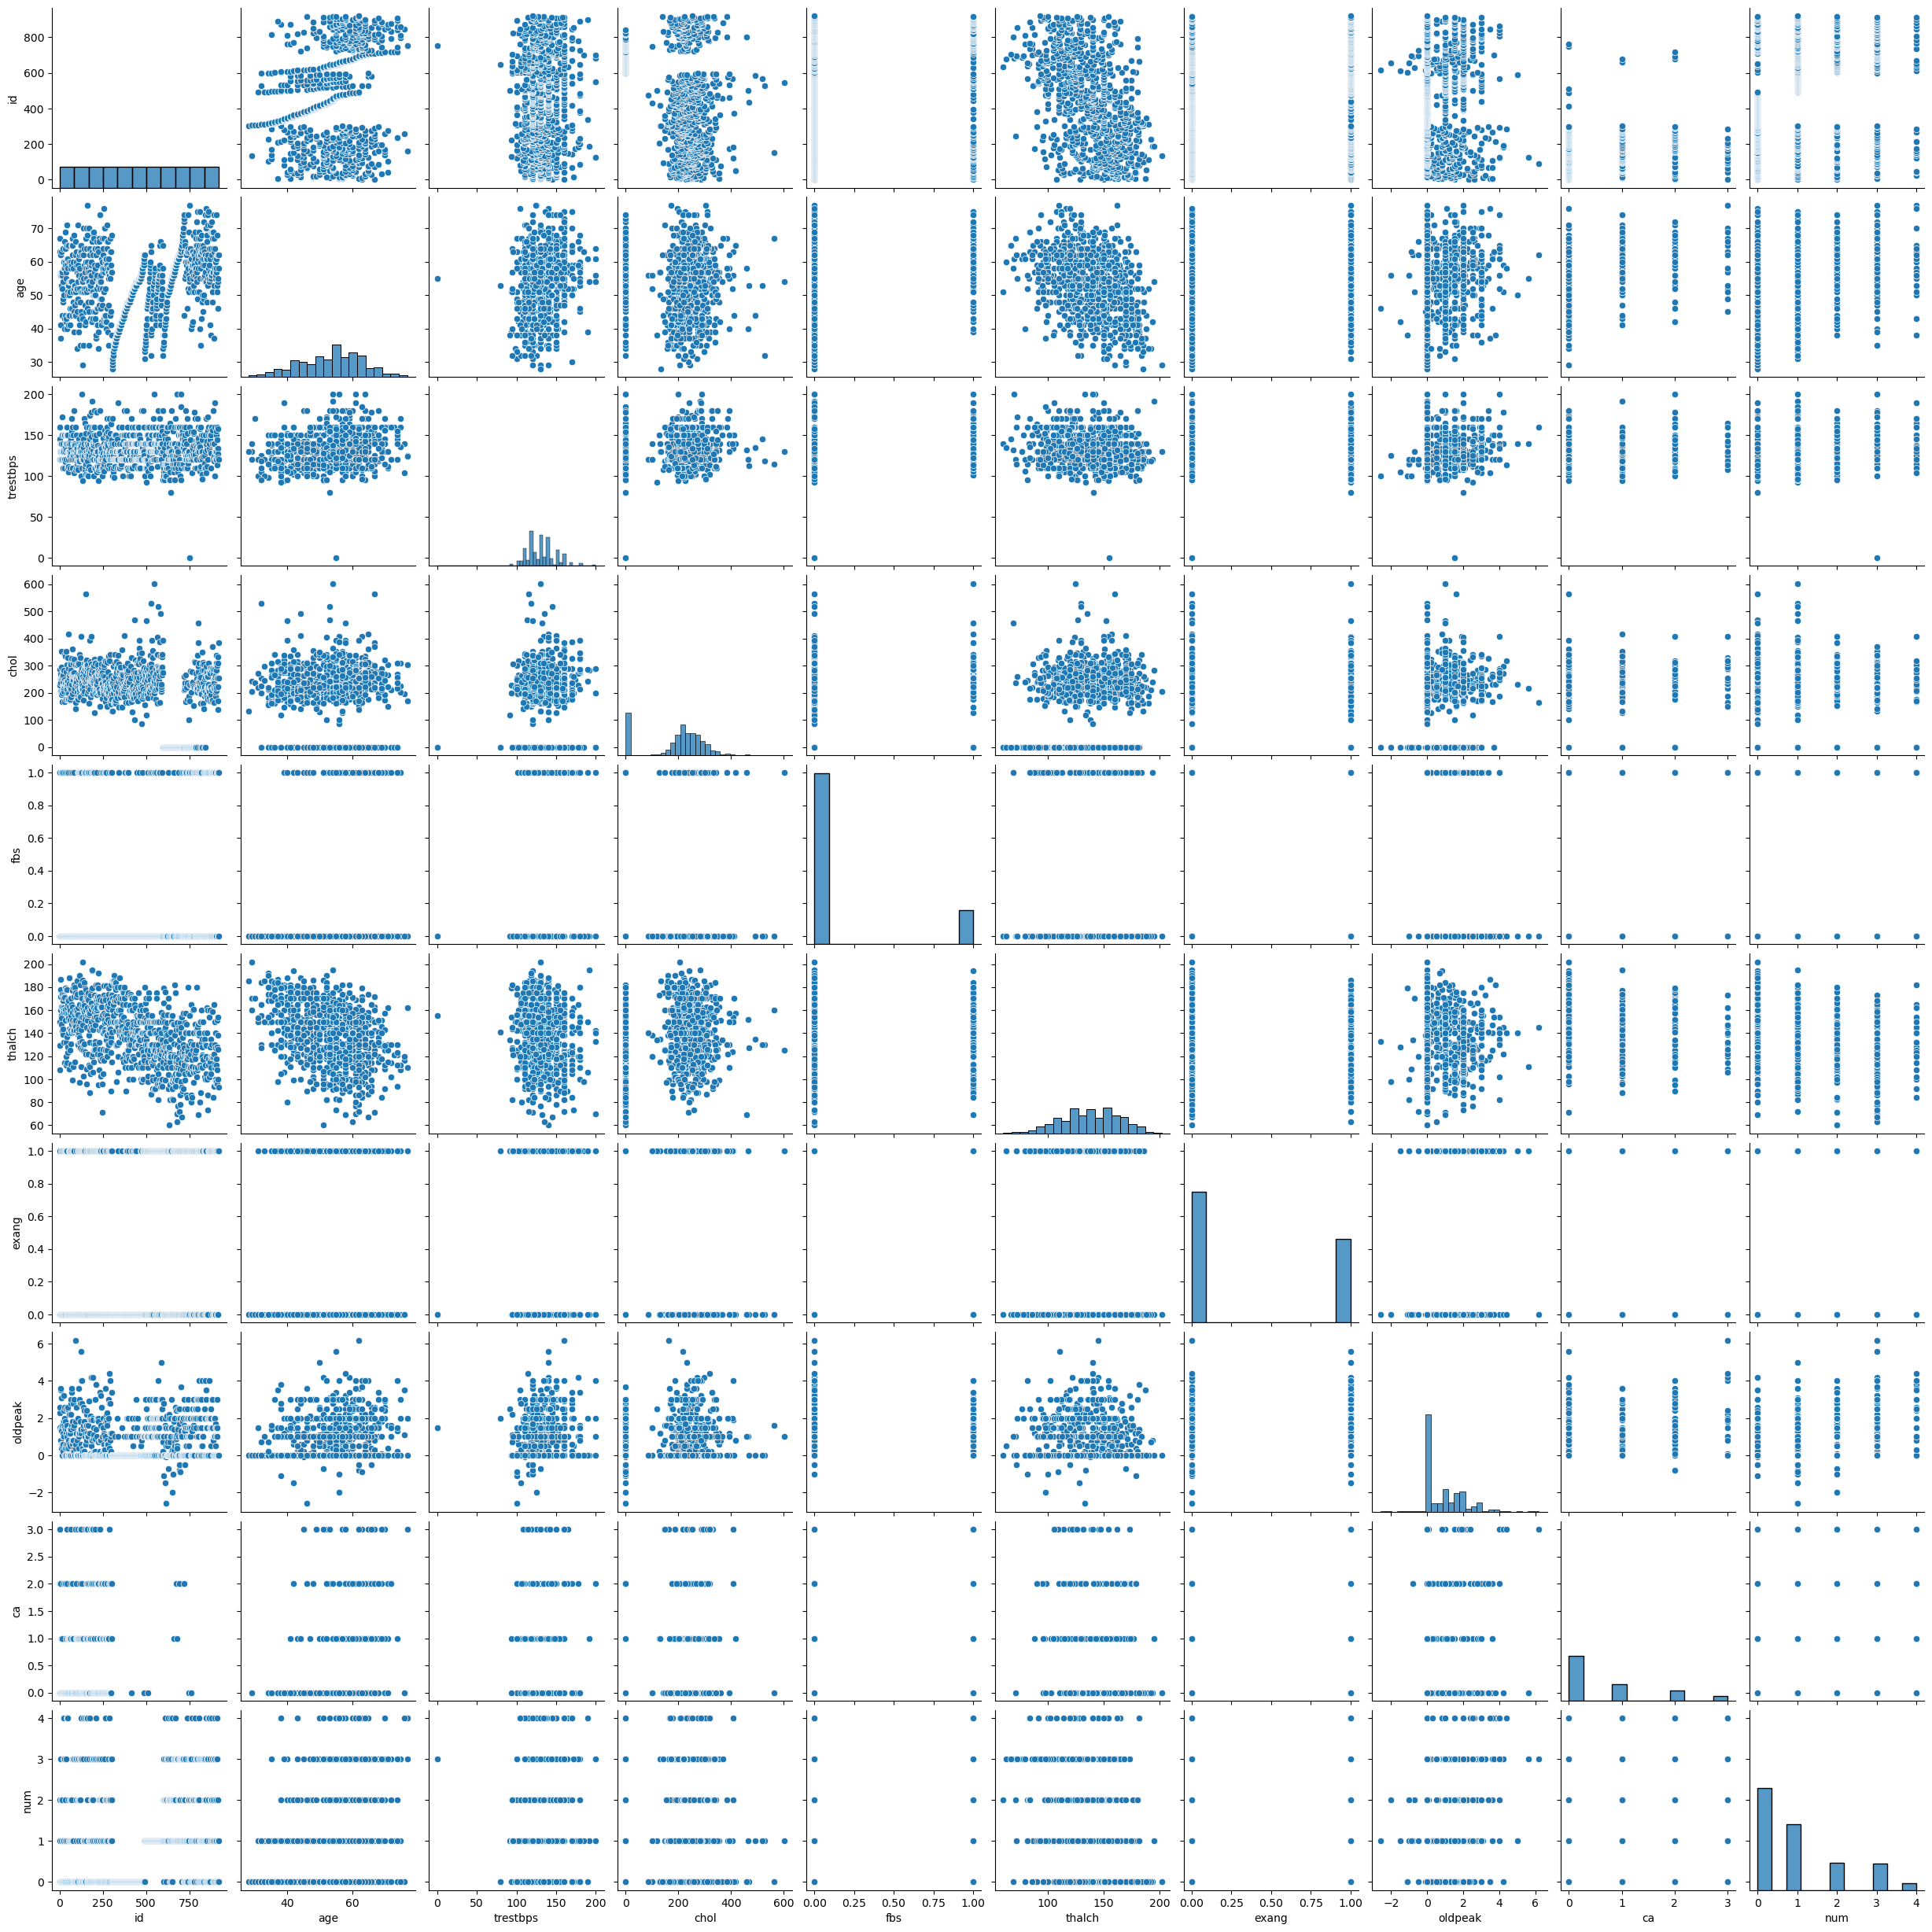

In [33]:
sns.pairplot(df)
plt.show()